In [1]:
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "../precip_data"
data_dir = '/Volumes/My Passport for Mac/cnn/data_update/with_precip/precip_data'
season = 'JAS'

In [3]:
spear_vals = spear_corr(season, data_dir)

In [7]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = plt.get_cmap('Reds_r', 128)
bottom = plt.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
cmap = ListedColormap(newcolors, name='RedBlue')

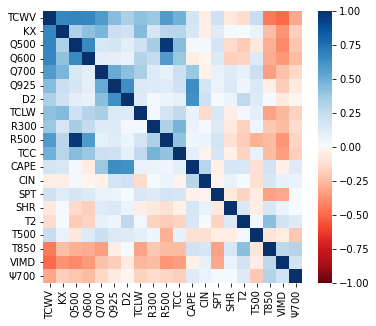

In [17]:
fig = plt.figure(figsize = (5.8, 5))

names = ['corr1', 'corr2', 'corr3', 'TCWV', 'CAPE', 'TCC', 'TCLW', 'R500', 'R300', 'D2', 'CIN', 'Q600', 
         'Q925', 'T2', 'KX','Q700', 'SHR',  'VIMD', r'$\Psi$700','SPT', 'T850', 'T500', 'Q500']
order_names = np.array([0, 1, 2, 3, 14,22,11,15,12, 9, 6, 8,7, 5, 4, 10, 19,16,13, 21, 20, 17, 18])
names2 = np.asarray(names)[order_names]

heatmap_mean = np.nanmean(spear_vals, axis = 0)
heatmap_mean_order = heatmap_mean[order_names, :]
heatmap_mean_order = heatmap_mean_order[:, order_names]

mask = np.triu(np.ones_like(heatmap_mean_order))
for j in range(mask.shape[0]):
    mask[j, j] = False
    
x = sns.heatmap(heatmap_mean_order[3:, 3:],
                cbar= True,
                vmin=-1, vmax=1,
                cbar_ax=None,
                cmap = cmap,
                   xticklabels= names2[3:], 
                    yticklabels = names2[3:])
#plt.savefig(data_dir + '/results/figs/spear_'+season+'.pdf', bbox_inches = 'tight')